In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [33]:
# Downloading and making the model usable
mp_holistic = mp.solutions.holistic 

# To draw the keypoints on the face and keep track of it
mp_drawing = mp.solutions.drawing_utils

In [40]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # Color convertion BGR to RGB
    image.flags.writeable = False                 # Image is no longer writable
    results = model.process(image)                # Making Prediction using the image captured by the camera
    image.flags.writeable = True                  # Makes the image writable again
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # Color convertion RGB to BGR
    return image,results

In [10]:
cv2.cvtColor??

In [41]:
def draw_landmarks(image,results):
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [49]:
def draw_styled_landmarks(image,results):
    # Draw face connections
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                               mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                               mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               ) 
     # Draw pose connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                               )
     # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                               )
     # Draw right hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                               ) 

In [38]:
mp_holistic.POSE_CONNECTIONS

In [37]:
mp_drawing.draw_landmarks??

In [51]:
# to capture and use the webcam
cap=cv2.VideoCapture(0)
# detection confi is the initial detection like where the the detection starts 
# and tracking is to make sure how the trace goes from the main line and further where can be changed accoringly to achive the sutable model 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        if not ret:
            break
        
        # Make detections
        image, results=mediapipe_detection(frame,holistic)
        print(results)
        
        
        # Draw Landmarks
        draw_styled_landmarks(image,results)
        
        # Show to screen
        cv2.imshow('my webcam',image)
        
        # breaking the frames
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [53]:
draw_styled_landmarks(frame,results)

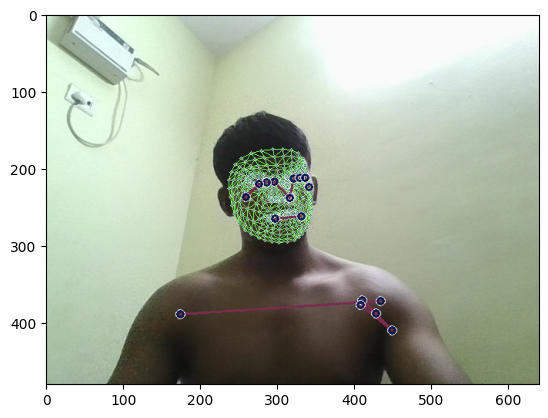

In [54]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))